<a href="https://colab.research.google.com/github/sagunkayastha/ILab_Tutorials/blob/master/Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Exercise 1

**Importing Libraries and data preperation**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

In [0]:
!wget https://github.com/sagunkayastha/ILab_Tutorials/raw/master/test_catvnoncat.h5
!wget https://github.com/sagunkayastha/ILab_Tutorials/raw/master/train_catvnoncat.h5
  
# helper function to import data
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes



--2019-09-22 17:11:29--  https://github.com/sagunkayastha/ILab_Tutorials/raw/master/test_catvnoncat.h5
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sagunkayastha/ILab_Tutorials/master/test_catvnoncat.h5 [following]
--2019-09-22 17:11:29--  https://raw.githubusercontent.com/sagunkayastha/ILab_Tutorials/master/test_catvnoncat.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 616958 (602K) [application/octet-stream]
Saving to: ‘test_catvnoncat.h5’

test_catvnoncat.h5  100%[===================>] 602.50K  --.-KB/s    in 0.006s  

2019-09-22 17:11:29 (94.3 MB/s) - ‘test_catvnoncat.h5’ saved [616958/616

y = [1], it's a 'cat' picture.


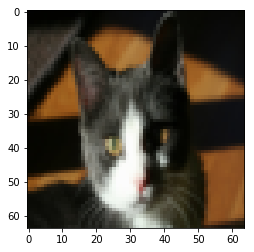

In [0]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()


# Example
index = 19
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

In [0]:
train_set_x =train_set_x_orig / 255.
test_set_x = test_set_x_orig / 255.
train_set_x.shape

(209, 64, 64, 3)

**Importing Keras libraries**

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
import numpy as np
np.random.seed(1000)


**Model building**

In [0]:
model = Sequential()
model.add(Conv2D(filters=96, input_shape=(64,64,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#Conv 2
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#model.add(BatchNormalization(axis=-1))

model.add(Dense(1,activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 14, 14, 96)        34944     
_________________________________________________________________
activation_14 (Activation)   (None, 14, 14, 96)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 96)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 256)         2973952   
_________________________________________________________________
activation_15 (Activation)   (None, 7, 7, 256)         0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

**Compile and run**

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_set_x, train_set_y.T, epochs=10,batch_size=8)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
209/209 [==============================] - 9s 41ms/step - loss: 5.2203 - acc: 0.6459
Epoch 2/10
209/209 [==============================] - 1s 3ms/step - loss: 5.5526 - acc: 0.6555
Epoch 3/10
209/209 [==============================] - 1s 3ms/step - loss: 5.5526 - acc: 0.6555
Epoch 4/10
209/209 [==============================] - 1s 3ms/step - loss: 5.5526 - acc: 0.6555
Epoch 5/10
209/209 [==============================] - 1s 3ms/step - loss: 5.5526 - acc: 0.6555
Epoch 6/10
209/209 [==============================] - 1s 3ms/step - loss: 5.5526 - acc: 0.6555
Epoch 7/10
209/209 [==============================] - 1s 3ms/step - loss: 5.5526 - acc: 0.6555
Epoch 8/10
209/209 [==============================] - 1s 3ms/step - loss: 5.5526 - acc: 0.6555
Epoch 9/10
209/209 [==============================] - 1s 3ms/step - loss: 5.5526 - acc: 0.6555
Epoch 10/10
209/209 [=============================

In [0]:
model = Sequential()
model.add(Conv2D(filters=96, input_shape=(64,64,3), kernel_size=(3,3),\
 strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#Conv 2
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#model.add(BatchNormalization(axis=-1))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_set_x, train_set_y.T, epochs=10,batch_size=8)

Epoch 1/10
209/209 [==============================] - 4s 21ms/step - loss: 0.6365 - acc: 0.6459
Epoch 2/10
209/209 [==============================] - 3s 13ms/step - loss: 0.4219 - acc: 0.7895
Epoch 3/10
209/209 [==============================] - 3s 12ms/step - loss: 0.4427 - acc: 0.7895
Epoch 4/10
209/209 [==============================] - 3s 12ms/step - loss: 0.3878 - acc: 0.7799
Epoch 5/10
209/209 [==============================] - 3s 13ms/step - loss: 0.3794 - acc: 0.8278
Epoch 6/10
209/209 [==============================] - 3s 13ms/step - loss: 0.2526 - acc: 0.9139
Epoch 7/10
209/209 [==============================] - 3s 12ms/step - loss: 0.2921 - acc: 0.8804
Epoch 8/10
209/209 [==============================] - 3s 12ms/step - loss: 0.1708 - acc: 0.9378
Epoch 9/10
209/209 [==============================] - 3s 13ms/step - loss: 0.1222 - acc: 0.9569
Epoch 10/10
209/209 [==============================] - 3s 13ms/step - loss: 0.0795 - acc: 0.9665


# Convolution Exercise 1

In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
#fashion_mnist = keras.datasets.fashion_mnist

#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255


number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


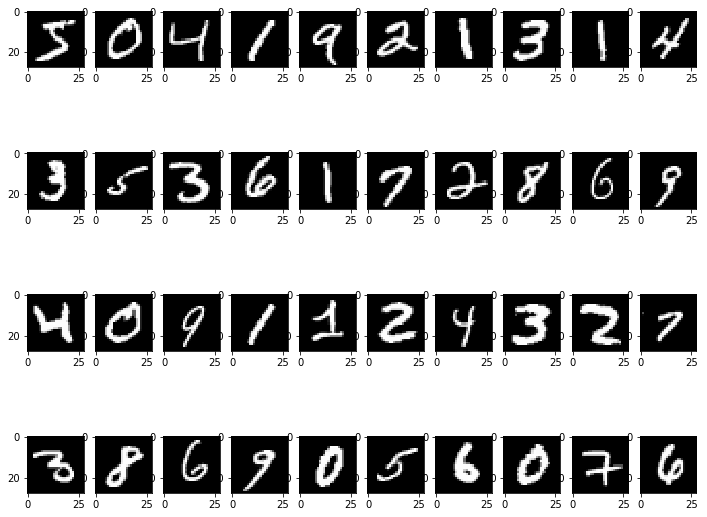

In [0]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape((28,28)),interpolation='nearest',cmap='gray')
plt.show()

In [0]:
model = Sequential()
model.add(Conv2D(filters=96, input_shape=(28,28,1), kernel_size=(3,3),\
 strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#Conv 2
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Conv 3
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#model.add(BatchNormalization(axis=-1))

model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, Y_train,validation_data=(X_test,Y_test),epochs=1,batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 11s 184us/step - loss: 0.1327 - acc: 0.9586 - val_loss: 0.0467 - val_acc: 0.9843
